In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv(r'train.csv')

In [14]:
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.shape

(891, 12)

In [18]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
data=data.drop(columns='Cabin',axis=1)


In [21]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [22]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

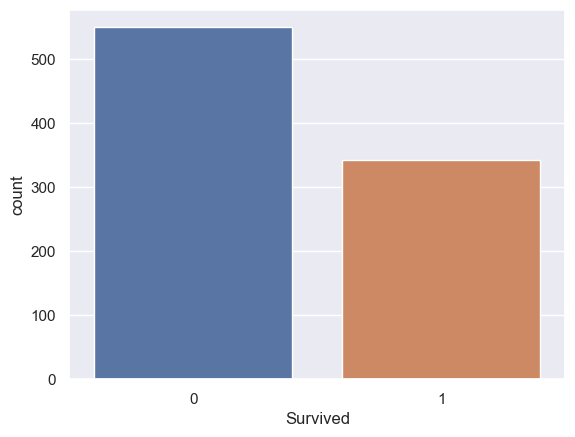

In [25]:
sns.countplot(x='Survived',data= data)

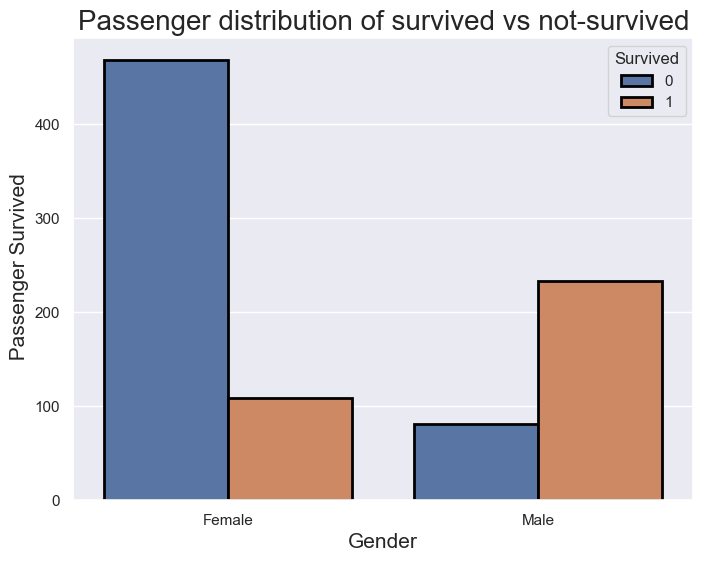

In [26]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = data, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel(" Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(data.Survived.unique()),labels);


<Axes: xlabel='Sex', ylabel='count'>

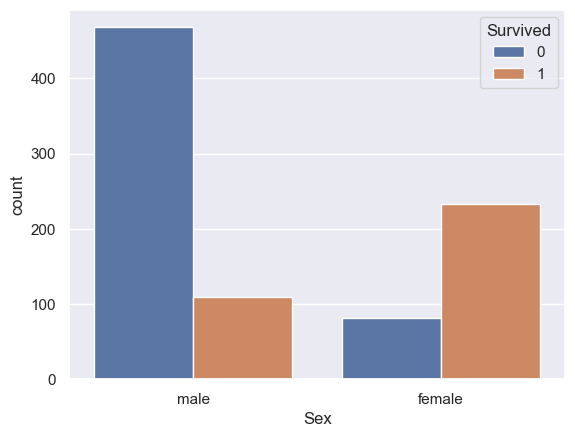

In [27]:
sns.countplot(x='Sex', hue='Survived', data= data)

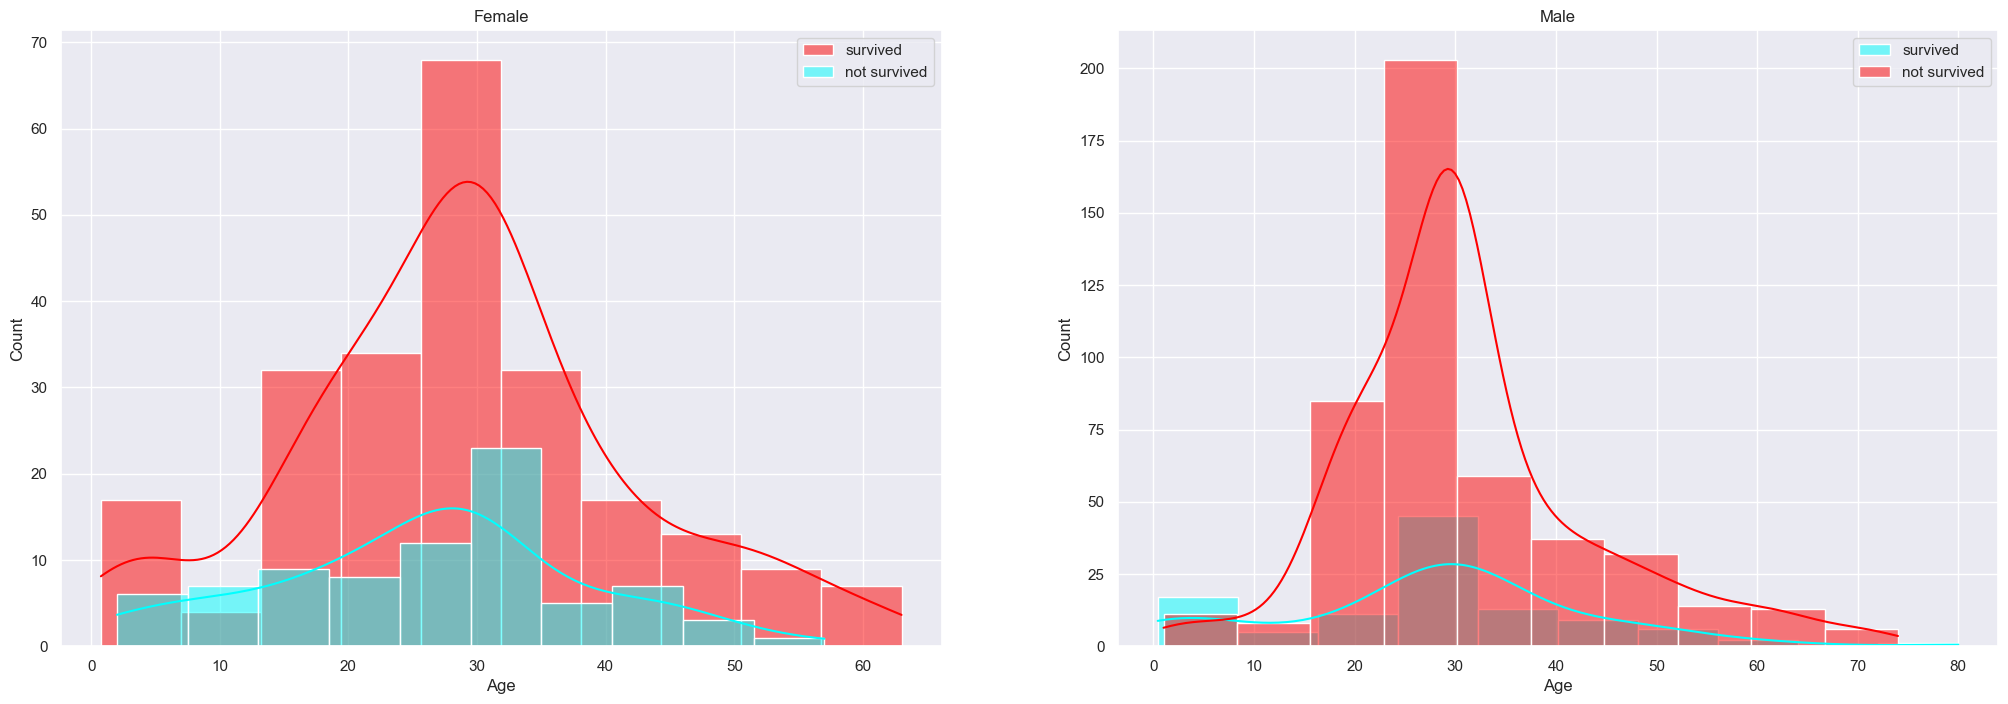

In [28]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

women = data[data['Sex']=='female']
men = data[data['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[0],color='red', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[0],color='cyan', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1],color='cyan', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[1],color='red', kde=True)
ax.legend()
ax.set_title('Male');

<Axes: xlabel='Pclass', ylabel='count'>

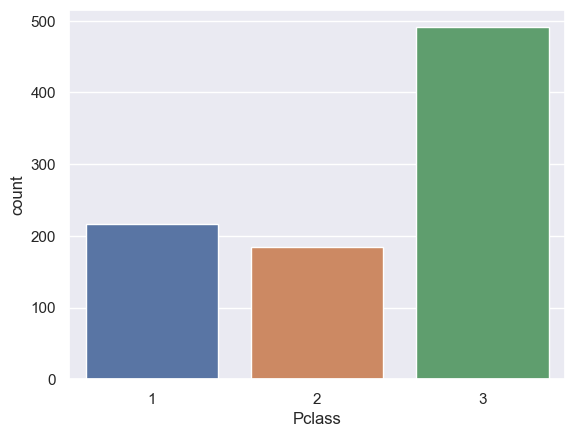

In [29]:
sns.countplot(x='Pclass', data=data)

In [30]:
#sns.heatmap(data.corr(), annot=True, cmap='CMRmap_r')
#plt.show()

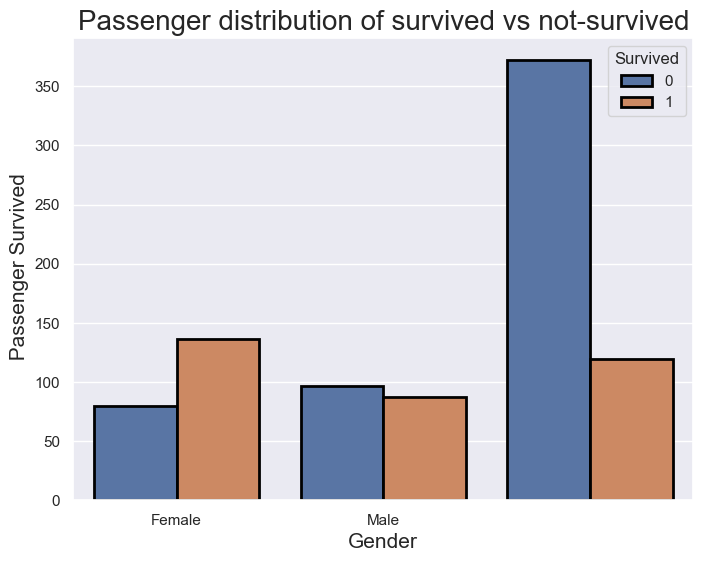

In [31]:
#sns.countplot('Pclass', hue='Survived', data=titanic_data)
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Pclass', data = data, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel(" Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(data.Survived.unique()),labels);


In [32]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [34]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [35]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [36]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = data['Survived']

In [37]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [38]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [40]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (712, 7)
Shape of testing feature: (179, 7)
Shape of training label: (712,)
Shape of training label: (179,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
regressor= LogisticRegression()  
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
x_pred=regressor.predict(X_train)

c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print(" Logistic Regression Test Score:",regressor.score(X_test,y_test))
print(" Logistic Regression Train Score:",regressor.score(X_train,y_train))

 Logistic Regression Test Score: 0.7821229050279329
 Logistic Regression Train Score: 0.8075842696629213


In [44]:
print("KNN Algotithm")
from sklearn.neighbors import KNeighborsClassifier  
kn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
kn.fit(X_train, y_train) 
y_pred= kn.predict(X_test)  
print(" KNN Test Score:",kn.score(X_test,y_test))
print(" KNN Train Score:",kn.score(X_train,y_train))

KNN Algotithm
 KNN Test Score: 0.6815642458100558
 KNN Train Score: 0.8075842696629213


In [45]:
print("Decision Tree Classifier")
dn= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dn.fit(X_train, y_train)
y_pred= dn.predict(X_test)
print(" Decision Tree Test Score:",dn.score(X_test,y_test))
print(" Decision Tree Train Score:",dn.score(X_train,y_train))

Decision Tree Classifier
 Decision Tree Test Score: 0.7653631284916201
 Decision Tree Train Score: 0.9859550561797753


In [46]:
print("Random Forest Classifier")
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print(" Random Forest Test Score:",classifier.score(X_test,y_test))
print(" Random Forest Train Score:",classifier.score(X_train,y_train))

Random Forest Classifier
 Random Forest Test Score: 0.7988826815642458
 Random Forest Train Score: 0.9719101123595506


In [47]:
names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNeighborsClassifier"
]
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_train)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_train, y_pred))
    ac = accuracy_score(y_train, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('*'*50)

Confusion matrix of  Logistic Regression
[[390  59]
 [ 78 185]]
Accuracy score is  0.8075842696629213
**************************************************
Confusion matrix of  Decision Tree
[[448   1]
 [  9 254]]
Accuracy score is  0.9859550561797753
**************************************************
Confusion matrix of  Random Forest
[[446   3]
 [  7 256]]
Accuracy score is  0.9859550561797753
**************************************************
Confusion matrix of  KNeighborsClassifier
[[398  51]
 [ 86 177]]
Accuracy score is  0.8075842696629213
**************************************************


c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


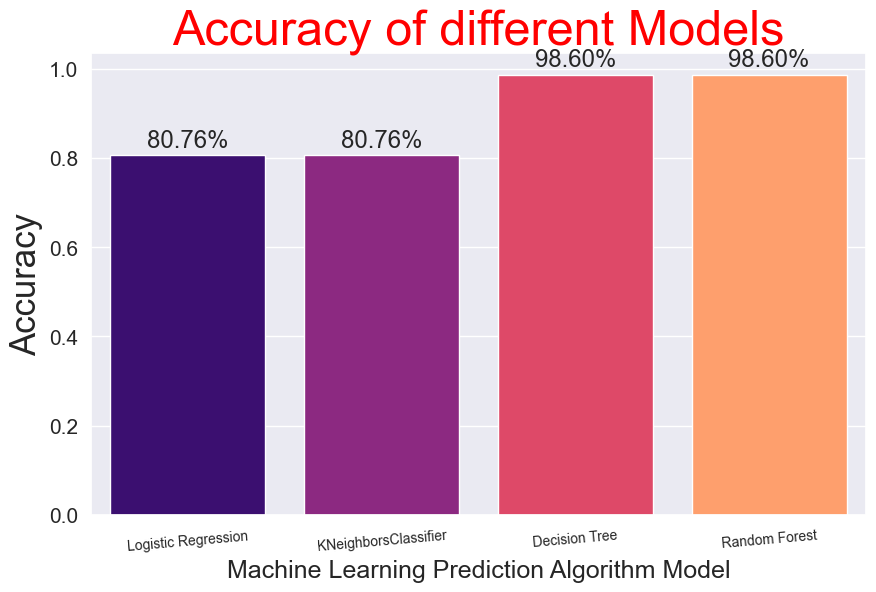

In [49]:
Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, kind='quicksort', na_position='last', ignore_index=True)

plt.rcParams['figure.figsize']=10,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list, palette='magma',saturation =4.5)
sns.color_palette("magma", as_cmap=True)
plt.xlabel("Machine Learning Prediction Algorithm Model", fontsize = 18 )
plt.ylabel("Accuracy", fontsize = 25)
plt.title("Accuracy of different Models", fontsize = 35, color="red")
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 5)
plt.yticks(fontsize = 15)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()